In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
pd.set_option('max_columns', None)

In [3]:
data = pd.read_csv("datamodel.csv")
dataframe2 = pd.read_csv("datamodel.csv")
dataframe3 = pd.read_csv("datamodel.csv")

In [4]:
data.head()

,Unnamed: 0,UNITID,TYPE,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,NUM_APPS_ADMIT,TOTAL_AMOUNT_PELL_TOUG,STATE,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,0,100654,1,8610,1414,9855,19916507,SOUTH,7257779,27527791,176182,0
1,1,100706,1,9730,1608,5793,8533685,SOUTH,12878882,20821717,109283,0
2,2,100724,1,8328,2740,7027,13341998,SOUTH,12928881,15714772,170200,0
3,3,100751,1,10780,840,39560,26353781,SOUTH,103079114,60453485,772030,0
4,4,100830,1,7992,868,4606,11282206,SOUTH,4592684,7303651,105571,0


In [5]:
data.shape

(1239, 12)

In [6]:
data.drop("Unnamed: 0",axis=1,inplace=True)

# Seperate Categorical and Numerical variables 

In [7]:
def seperate_colnames(dataframe):
    global catcols,numcols
    catcols = []
    numcols= []
    for item in dataframe:
        if item == "UNITID":
            continue
            #dummy variables and string values for levels 
        if dataframe[item].max() ==1 or dataframe[item].dtype ==object:
            catcols.append(item)
        else:
            numcols.append(item)
    print(numcols)
    print()
    print(catcols)

In [8]:
seperate_colnames(data)

['TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG', 'NUM_APPS_ADMIT', 'TOTAL_AMOUNT_PELL_TOUG', 'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT', 'LOCAL_GRANT']

['TYPE', 'STATE']


In [9]:
numcols = numcols

In [10]:
type(numcols)

list

# Numerical Data Frame Function

In [11]:
def numdf(dataframe):
    global numdata
    for col in dataframe.columns:
        if col not in numcols:
            col = col
            del dataframe[col]
    numdata = dataframe
    return dataframe.head()

# Categorical  Data Frame Function

In [12]:
def catdf(dataframe):
    global catdata
    for col in dataframe.columns:
        if col not in catcols:
            col = col
            del dataframe[col]
    catdata = dataframe
    return dataframe.head()

# Numerical Data frame

In [13]:
numdf(dataframe2)

,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,NUM_APPS_ADMIT,TOTAL_AMOUNT_PELL_TOUG,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,8610,1414,9855,19916507,7257779,27527791,176182,0
1,9730,1608,5793,8533685,12878882,20821717,109283,0
2,8328,2740,7027,13341998,12928881,15714772,170200,0
3,10780,840,39560,26353781,103079114,60453485,772030,0
4,7992,868,4606,11282206,4592684,7303651,105571,0


# Categorical  Data frame

In [14]:
catdf(dataframe3)

,TYPE,STATE
0,1,SOUTH
1,1,SOUTH
2,1,SOUTH
3,1,SOUTH
4,1,SOUTH


In [15]:
catdata.sum(axis=0)


TYPE                                                   436
STATE    SOUTHSOUTHSOUTHSOUTHSOUTHSOUTHSOUTHSOUTHSOUTHS...
dtype: object

In [15]:
# Categorical columns dropping 

columns = [["StudyAbroad","ROOM","ADMS_REUIRED_GPA","DUAL_ENROLLMENT","AP_CREDIT","COUNSELING_SERVICES","EMPLOYMENT_SERVICE"
           "ACADEMIC_LIBRARY","TUITION_PAYMENTPLAN"]

# Coorelation 

<AxesSubplot:>

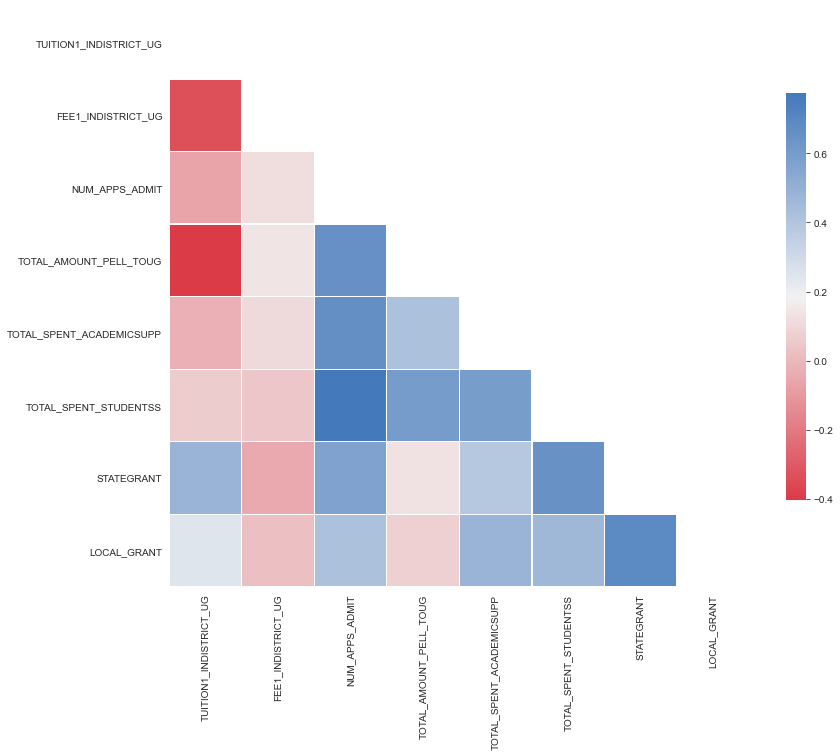

In [16]:
corr = numdata.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.25, cbar_kws={"shrink": .5}, ax=ax)

# Find Colinear Columns
Suggested colinear columns to drop

In [17]:
cor_matrix=numdata.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.80)]
print(); print(to_drop)


[]


# Drop Colinear Columns 

In [28]:
def drop_colinear_cols():
    global data
    data = pd.read_csv("datamodel.csv")
    data.drop([col for col in ["StudyAbroad","ROOM","ADMS_REUIRED_GPA","DUAL_ENROLLMENT","AP_CREDIT","Unnamed: 0",
                               "COUNSELING_SERVICES","EMPLOYMENT_SERVICE",
           "ACADEMIC_LIBRARY","TUITION_PAYMENTPLAN","ATHASSOC",
           'TUITION2_INSTATE_UG', 'FEE2_INSTATE_UG', 'TUITION3_OUTSTATE_UG', 
            'FEE3_OUTOFSTATE_UG', 'INSTATE_TUITION_FEES_P', 'OUTSTATE_TUITION_FEES_P', 
            'NUM_FULLTIME_FALLCOHRT', 'TOTAL_FIRSTYR_UG', 'TOTAL_AID_UG', 'TOTAL_AMOUNT_FLOANS_UG',
            'TOTAL_SALARY_FT_CONTRACT', 'TOTAL_LIABILITIES', 'TOTAL_PELL', 'DISCOUNTSAPPLIED_TO_TUTFEES']
               if col in data], axis=1, inplace=True)
    print("Name of Dataframe: data")
    return data.head()

In [29]:
drop_colinear_cols()

Name of Dataframe: data


,UNITID,TYPE,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,NUM_APPS_ADMIT,TOTAL_AMOUNT_PELL_TOUG,STATE,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,100654,1,8610,1414,9855,19916507,SOUTH,7257779,27527791,176182,0
1,100706,1,9730,1608,5793,8533685,SOUTH,12878882,20821717,109283,0
2,100724,1,8328,2740,7027,13341998,SOUTH,12928881,15714772,170200,0
3,100751,1,10780,840,39560,26353781,SOUTH,103079114,60453485,772030,0
4,100830,1,7992,868,4606,11282206,SOUTH,4592684,7303651,105571,0


In [30]:
data.columns

Index(['UNITID', 'TYPE', 'TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG',
       'NUM_APPS_ADMIT', 'TOTAL_AMOUNT_PELL_TOUG', 'STATE',
       'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT',
       'LOCAL_GRANT'],
      dtype='object')

In [21]:
print(data.shape)

(1239, 27)


In [22]:
data.columns

Index(['UNITID', 'TYPE', 'FORPROFIT', 'TUITVARY', 'BOARD',
       'TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG', 'OFFCAMPUS_SELF_EXP',
       'OFFCAMPUS_FAMILY_EXP', 'ADMS_REQUIRED_COLLEGEPREP', 'NUM_APPS_ADMIT',
       'FULLTIME_RETENTIONRATE_SPRING', 'STUD_TO_FAL_RATIO',
       'PRCNT_FIRSTYR_UG', 'PRCNT_UG_AWARDEDAID', 'PRCNT_UG_AWARDED_PELL',
       'TOTAL_AMOUNT_PELL_TOUG', 'PRCENT_FLOANS_TOUG', 'STATE', 'HLOFFER',
       'TEACHER_CERT', 'TUITION_GURANTEE', 'TOTAL_ASSETS',
       'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT',
       'LOCAL_GRANT'],
      dtype='object')

In [23]:
data.head()

,UNITID,TYPE,FORPROFIT,TUITVARY,BOARD,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,OFFCAMPUS_SELF_EXP,OFFCAMPUS_FAMILY_EXP,ADMS_REQUIRED_COLLEGEPREP,NUM_APPS_ADMIT,FULLTIME_RETENTIONRATE_SPRING,STUD_TO_FAL_RATIO,PRCNT_FIRSTYR_UG,PRCNT_UG_AWARDEDAID,PRCNT_UG_AWARDED_PELL,TOTAL_AMOUNT_PELL_TOUG,PRCENT_FLOANS_TOUG,STATE,HLOFFER,TEACHER_CERT,TUITION_GURANTEE,TOTAL_ASSETS,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,100654,1,0,1,1,8610,1414,3090,3440,0,9855,54,18,32,87,71,19916507,75,SOUTH,Highest_Doc,1,0,278440664,7257779,27527791,176182,0
1,100706,1,0,1,1,9730,1608,4076,4076,0,5793,82,19,19,72,24,8533685,39,SOUTH,Highest_Doc,1,0,521103730,12878882,20821717,109283,0
2,100724,1,0,1,1,8328,2740,4228,4228,0,7027,62,15,27,93,74,13341998,78,SOUTH,Highest_Doc,1,0,325537085,12928881,15714772,170200,0
3,100751,1,0,1,0,10780,840,4620,5692,1,39560,87,20,21,67,17,26353781,36,SOUTH,Highest_Doc,1,0,4881510109,103079114,60453485,772030,0
4,100830,1,0,1,0,7992,868,3830,3830,0,4606,70,16,13,77,47,11282206,54,SOUTH,Highest_Doc,1,0,184716313,4592684,7303651,105571,0


In [24]:
data.shape

(1239, 27)

In [23]:
print(np.corrcoef(data["TUITION1_INDISTRICT_UG"],data["TYPE"]))

[[ 1.         -0.77177976]
 [-0.77177976  1.        ]]


# Dropping more columns 

Private universities have fixed tution for out of state students 

In [46]:
data.columns

Index(['UNITID', 'TYPE', 'TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG',
       'NUM_APPS_ADMIT', 'TOTAL_AMOUNT_PELL_TOUG', 'STATE',
       'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT',
       'LOCAL_GRANT'],
      dtype='object')

In [50]:
datacor = data.drop("UNITID",axis=1)
datacor.columns

Index(['TYPE', 'TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG',
       'NUM_APPS_ADMIT', 'TOTAL_AMOUNT_PELL_TOUG', 'STATE',
       'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT',
       'LOCAL_GRANT'],
      dtype='object')

<AxesSubplot:>

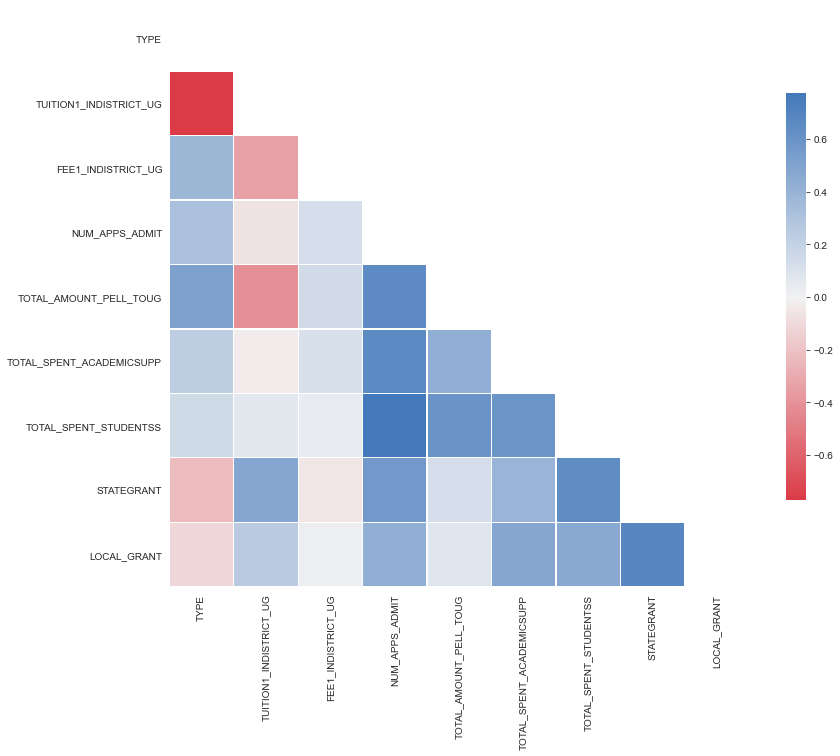

In [51]:
corr = datacor.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.25, cbar_kws={"shrink": .5}, ax=ax)

In [32]:
cor_matrix=data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.80)]
print(); print(to_drop)


[]


In [30]:
data.head()

,UNITID,TYPE,FORPROFIT,BOARD,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,OFFCAMPUS_SELF_EXP,OFFCAMPUS_FAMILY_EXP,ADMS_REQUIRED_COLLEGEPREP,NUM_APPS_ADMIT,FULLTIME_RETENTIONRATE_SPRING,STUD_TO_FAL_RATIO,PRCNT_FIRSTYR_UG,PRCNT_UG_AWARDEDAID,PRCNT_UG_AWARDED_PELL,TOTAL_AMOUNT_PELL_TOUG,PRCENT_FLOANS_TOUG,STATE,HLOFFER,TEACHER_CERT,TUITION_GURANTEE,TOTAL_ASSETS,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,100654,1,0,1,8610,1414,3090,3440,0,9855,54,18,32,87,71,19916507,75,SOUTH,Highest_Doc,1,0,278440664,7257779,27527791,176182,0
1,100706,1,0,1,9730,1608,4076,4076,0,5793,82,19,19,72,24,8533685,39,SOUTH,Highest_Doc,1,0,521103730,12878882,20821717,109283,0
2,100724,1,0,1,8328,2740,4228,4228,0,7027,62,15,27,93,74,13341998,78,SOUTH,Highest_Doc,1,0,325537085,12928881,15714772,170200,0
3,100751,1,0,0,10780,840,4620,5692,1,39560,87,20,21,67,17,26353781,36,SOUTH,Highest_Doc,1,0,4881510109,103079114,60453485,772030,0
4,100830,1,0,0,7992,868,3830,3830,0,4606,70,16,13,77,47,11282206,54,SOUTH,Highest_Doc,1,0,184716313,4592684,7303651,105571,0


# VIF 

Outputting the data frame before I run VIF 

In [36]:
#data.to_csv("data_before_vi.csv")
data_b4_vif = pd.read_csv("data_before_vi.csv")
data_b4_vif.drop("Unnamed: 0",axis=1,inplace=True)

In [37]:
data_b4_vif.head()

,UNITID,TYPE,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,NUM_APPS_ADMIT,TOTAL_AMOUNT_PELL_TOUG,STATE,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,100654,1,8610,1414,9855,19916507,SOUTH,7257779,27527791,176182,0
1,100706,1,9730,1608,5793,8533685,SOUTH,12878882,20821717,109283,0
2,100724,1,8328,2740,7027,13341998,SOUTH,12928881,15714772,170200,0
3,100751,1,10780,840,39560,26353781,SOUTH,103079114,60453485,772030,0
4,100830,1,7992,868,4606,11282206,SOUTH,4592684,7303651,105571,0


# Removing dependent variable and only using predictors
VIF is affected by the predictors in it
Seperating into  different data when removing any predictors

In [38]:
 data_b4_vif.drop(["NUM_APPS_ADMIT"],axis=1,inplace=True)

In [39]:
 data_b4_vif.drop(["UNITID"],axis=1,inplace=True)

In [40]:
data_b4_vif.columns

Index(['TYPE', 'TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG',
       'TOTAL_AMOUNT_PELL_TOUG', 'STATE', 'TOTAL_SPENT_ACADEMICSUPP',
       'TOTAL_SPENT_STUDENTSS', 'STATEGRANT', 'LOCAL_GRANT'],
      dtype='object')

In [41]:
seperate_colnames(data_b4_vif)
numdf(data_b4_vif)

['TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG', 'TOTAL_AMOUNT_PELL_TOUG', 'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT', 'LOCAL_GRANT']

['TYPE', 'STATE']


,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,TOTAL_AMOUNT_PELL_TOUG,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,8610,1414,19916507,7257779,27527791,176182,0
1,9730,1608,8533685,12878882,20821717,109283,0
2,8328,2740,13341998,12928881,15714772,170200,0
3,10780,840,26353781,103079114,60453485,772030,0
4,7992,868,11282206,4592684,7303651,105571,0


In [42]:
numdata

,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,TOTAL_AMOUNT_PELL_TOUG,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,8610,1414,19916507,7257779,27527791,176182,0
1,9730,1608,8533685,12878882,20821717,109283,0
2,8328,2740,13341998,12928881,15714772,170200,0
3,10780,840,26353781,103079114,60453485,772030,0
4,7992,868,11282206,4592684,7303651,105571,0
...,...,...,...,...,...,...,...
1234,12000,150,223850,81114,643492,931387,1915391
1235,8500,150,484303,9870,671452,544723,1428549
1236,8500,150,129212,0,415860,280679,1826216
1237,4776,780,202088,313687,853465,41905,2692694


In [43]:
def vif_function(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i)
                          for i in range(len(dataframe.columns))]
    userinput = input("Do you want to display all columns VIF :")
    inputyes = ["Yes","yes","YES","Y","y"]
    inputno = ["N","n","No","NO"]
    if userinput in inputyes:
        pd.set_option('max_rows', None)
    else:
        pd.set_option("max_rows",20)
        pass
    print(vif_data)
    userinput2 = int(input("What is your Maximum VIF VALUE:"))
    valuesover = []
    for x, y in vif_data.iterrows():
        if (y[1]) >=userinput2:
            valuesover.append(y[0])
    return valuesover

In [44]:
vif_function(numdata)

Do you want to display all columns VIF :yes
                    feature   VIF
0    TUITION1_INDISTRICT_UG  2.14
1        FEE1_INDISTRICT_UG  1.64
2    TOTAL_AMOUNT_PELL_TOUG  2.75
3  TOTAL_SPENT_ACADEMICSUPP  2.11
4     TOTAL_SPENT_STUDENTSS  5.29
5                STATEGRANT  4.61
6               LOCAL_GRANT -0.05
What is your Maximum VIF VALUE:8


[]

In [40]:
data_after_vif =  data_b4_vif.drop(['TUITION1_INDISTRICT_UG',
 'OFFCAMPUS_SELF_EXP',
 'OFFCAMPUS_FAMILY_EXP',
 'FULLTIME_RETENTIONRATE_SPRING',
 'STUD_TO_FAL_RATIO',
 'PRCNT_FIRSTYR_UG',
 'PRCNT_UG_AWARDEDAID',
 'PRCNT_UG_AWARDED_PELL',
 'PRCENT_FLOANS_TOUG'],axis=1,inplace=False)

In [41]:
data_after_vif.shape

(1239, 7)

In [42]:
data_after_vif.head()

,FEE1_INDISTRICT_UG,TOTAL_AMOUNT_PELL_TOUG,TOTAL_ASSETS,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,1414,19916507,278440664,7257779,27527791,176182,0
1,1608,8533685,521103730,12878882,20821717,109283,0
2,2740,13341998,325537085,12928881,15714772,170200,0
3,840,26353781,4881510109,103079114,60453485,772030,0
4,868,11282206,184716313,4592684,7303651,105571,0


<AxesSubplot:>

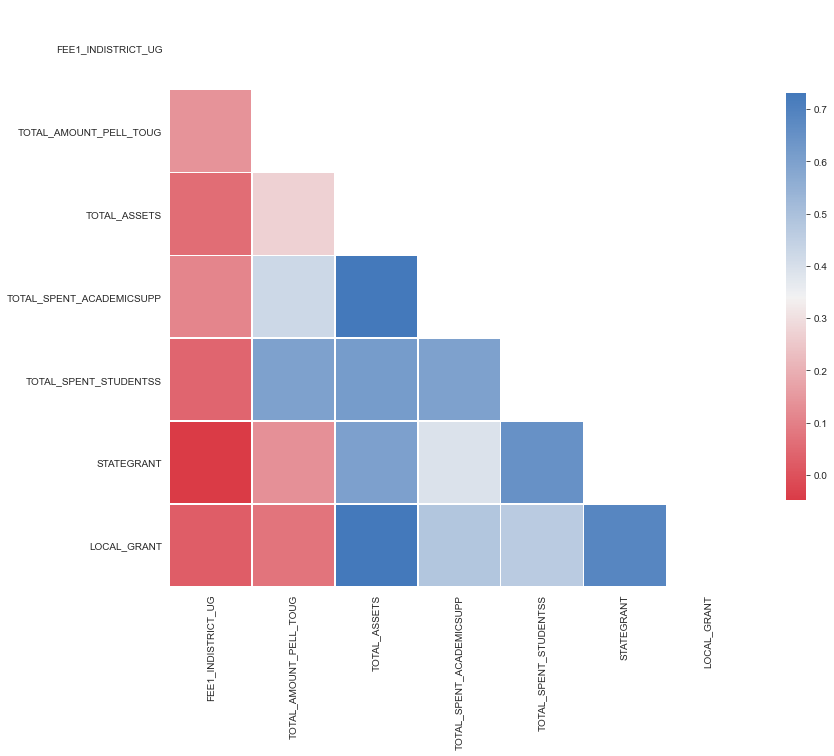

In [43]:
corr = data_after_vif.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.25, cbar_kws={"shrink": .5}, ax=ax)

In [45]:
data.corr()

,UNITID,TYPE,FORPROFIT,BOARD,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,OFFCAMPUS_SELF_EXP,OFFCAMPUS_FAMILY_EXP,ADMS_REQUIRED_COLLEGEPREP,NUM_APPS_ADMIT,FULLTIME_RETENTIONRATE_SPRING,STUD_TO_FAL_RATIO,PRCNT_FIRSTYR_UG,PRCNT_UG_AWARDEDAID,PRCNT_UG_AWARDED_PELL,TOTAL_AMOUNT_PELL_TOUG,PRCENT_FLOANS_TOUG,TEACHER_CERT,TUITION_GURANTEE,TOTAL_ASSETS,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
UNITID,1.00,-0.02,-0.03,0.05,-0.12,-0.04,0.00,0.06,0.06,-0.09,-0.07,0.01,0.08,0.01,0.06,-0.07,-0.15,-0.18,0.10,-0.01,-0.03,-0.09,-0.08,0.01
TYPE,-0.02,1.00,-0.60,-0.21,-0.77,0.38,0.14,0.09,0.25,0.32,0.09,0.56,-0.32,-0.47,0.07,0.52,-0.23,0.19,0.27,0.11,0.23,0.15,-0.23,-0.11
FORPROFIT,-0.03,-0.60,1.00,0.17,0.35,-0.22,-0.00,-0.03,-0.25,-0.28,-0.14,-0.28,0.13,0.35,0.06,-0.33,0.31,0.11,-0.17,-0.17,-0.22,-0.20,0.01,-0.05
BOARD,0.05,-0.21,0.17,1.00,0.02,-0.09,0.01,0.02,-0.15,-0.19,-0.20,-0.09,0.06,0.11,0.16,-0.20,0.04,-0.09,-0.05,-0.11,-0.15,-0.19,-0.10,-0.06
TUITION1_INDISTRICT_UG,-0.12,-0.77,0.35,0.02,1.00,-0.34,-0.30,-0.21,-0.08,-0.06,0.22,-0.57,0.38,0.33,-0.40,-0.40,0.15,-0.07,-0.22,0.11,-0.02,0.07,0.48,0.25
FEE1_INDISTRICT_UG,-0.04,0.38,-0.22,-0.09,-0.34,1.00,0.05,0.06,0.11,0.12,0.01,0.19,-0.07,-0.19,0.05,0.14,0.03,0.14,0.19,0.06,0.11,0.04,-0.05,0.03
OFFCAMPUS_SELF_EXP,0.00,0.14,-0.00,0.01,-0.30,0.05,1.00,0.67,-0.07,-0.01,-0.17,0.18,-0.21,-0.05,0.22,0.18,-0.04,0.01,0.08,-0.04,0.01,0.02,-0.13,-0.04
OFFCAMPUS_FAMILY_EXP,0.06,0.09,-0.03,0.02,-0.21,0.06,0.67,1.00,0.01,0.03,-0.10,0.16,-0.11,-0.04,0.15,0.13,-0.05,-0.01,0.04,-0.01,0.01,0.03,-0.09,-0.05
ADMS_REQUIRED_COLLEGEPREP,0.06,0.25,-0.25,-0.15,-0.08,0.11,-0.07,0.01,1.00,0.23,0.25,0.17,0.03,-0.13,-0.16,0.19,-0.19,0.04,0.01,0.13,0.14,0.16,0.08,0.02
NUM_APPS_ADMIT,-0.09,0.32,-0.28,-0.19,-0.06,0.12,-0.01,0.03,0.23,1.00,0.42,0.29,-0.05,-0.33,-0.23,0.66,-0.30,0.15,0.12,0.67,0.66,0.77,0.57,0.42


In [44]:
corr = data_after_vif.corr()
corr

,FEE1_INDISTRICT_UG,TOTAL_AMOUNT_PELL_TOUG,TOTAL_ASSETS,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
FEE1_INDISTRICT_UG,1.00,0.14,0.06,0.11,0.04,-0.05,0.03
TOTAL_AMOUNT_PELL_TOUG,0.14,1.00,0.27,0.42,0.60,0.13,0.08
TOTAL_ASSETS,0.06,0.27,1.00,0.73,0.62,0.60,0.73
TOTAL_SPENT_ACADEMICSUPP,0.11,0.42,0.73,1.00,0.60,0.39,0.48
TOTAL_SPENT_STUDENTSS,0.04,0.60,0.62,0.60,1.00,0.65,0.46
STATEGRANT,-0.05,0.13,0.60,0.39,0.65,1.00,0.69
LOCAL_GRANT,0.03,0.08,0.73,0.48,0.46,0.69,1.00


# Predictors

* TYPE: 1 Public, 0 private
* FOR PROFIT: 1 For profit, 0 No
* BOARD: 1 offer board, 0 no
* FEE 1_INDISTRICT UG : In-district required fees for full-time undergraduates
* ADMS_REQUIRED COLLEGEPREP: 1 = Required college prep completion, 0 did not 
* NUM APPS_ADMIT: Number of Applicants admitted  
* TOTAL_AMOUNT_PELL_TOUG: Total amount of Pell Grants to UnderGraduates  
* Teacher cert: 1 = if offers teacher cert, 0 if not
* TUITION_GURANTEE: 1 = Guarantees Tution will not rise over course of years in collee, 0 NO
* TOTAL ASSETS = Total assets of university 
* TOTAL_SPEND_ACADEMICSS: Total spend on academic support
* TOTAL_SPEND_STUDENTSS: Total spent on student support services
* STATE GRANT:Total Grants by state gov
* LOCAL GRANT: Total grants by local gov 
* STATE: Region located according to U.S Census
* HLOFFER: Highest Education Offered 

In [45]:
data_after_vif.columns

Index(['FEE1_INDISTRICT_UG', 'TOTAL_AMOUNT_PELL_TOUG', 'TOTAL_ASSETS',
       'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT',
       'LOCAL_GRANT'],
      dtype='object')

# Final Data Frame

In [46]:
data_after_vif.head()

,FEE1_INDISTRICT_UG,TOTAL_AMOUNT_PELL_TOUG,TOTAL_ASSETS,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,1414,19916507,278440664,7257779,27527791,176182,0
1,1608,8533685,521103730,12878882,20821717,109283,0
2,2740,13341998,325537085,12928881,15714772,170200,0
3,840,26353781,4881510109,103079114,60453485,772030,0
4,868,11282206,184716313,4592684,7303651,105571,0


# Write Final Model

In [47]:
finaldata  = pd.read_csv("finaldatav2.csv")

In [48]:
finaldata = finaldata.drop(['TUITION2_INSTATE_UG', 'FEE2_INSTATE_UG', 'TUITION3_OUTSTATE_UG', 
'FEE3_OUTOFSTATE_UG', 'INSTATE_TUITION_FEES_P', 'OUTSTATE_TUITION_FEES_P', 'NUM_FULLTIME_FALLCOHRT', 
'TOTAL_FIRSTYR_UG', 'TOTAL_AID_UG', 'TOTAL_AMOUNT_FLOANS_UG', 'TOTAL_SALARY_FT_CONTRACT', 
'TOTAL_LIABILITIES', 'TOTAL_PELL', 'DISCOUNTSAPPLIED_TO_TUTFEES','TUITION1_INDISTRICT_UG','OFFCAMPUS_SELF_EXP','OFFCAMPUS_FAMILY_EXP',
 'FULLTIME_RETENTIONRATE_SPRING','STUD_TO_FAL_RATIO','PRCNT_FIRSTYR_UG','PRCNT_UG_AWARDEDAID','PRCNT_UG_AWARDED_PELL',
 'PRCENT_FLOANS_TOUG',"StudyAbroad","ROOM","ADMS_REUIRED_GPA","DUAL_ENROLLMENT","AP_CREDIT","COUNSELING_SERVICES","EMPLOYMENT_SERVICE",
"ACADEMIC_LIBRARY","TUITION_PAYMENTPLAN","ATHASSOC",'TUITION2_INSTATE_UG', 'FEE2_INSTATE_UG', 'TUITION3_OUTSTATE_UG', 
'FEE3_OUTOFSTATE_UG', 'INSTATE_TUITION_FEES_P', 'OUTSTATE_TUITION_FEES_P','NUM_FULLTIME_FALLCOHRT', 'TOTAL_FIRSTYR_UG', 'TOTAL_AID_UG', 'TOTAL_AMOUNT_FLOANS_UG',
            'TOTAL_SALARY_FT_CONTRACT', 'TOTAL_LIABILITIES', 'TOTAL_PELL', 'DISCOUNTSAPPLIED_TO_TUTFEES'], axis=1)

In [49]:
finaldata.head()

,UNITID,TYPE,FORPROFIT,TUITVARY,BOARD,FEE1_INDISTRICT_UG,ADMS_REQUIRED_COLLEGEPREP,NUM_APPS_ADMIT,TOTAL_AMOUNT_PELL_TOUG,STATE,HLOFFER,TEACHER_CERT,TUITION_GURANTEE,TOTAL_ASSETS,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,100654,1,0,1,1,1414,0,9855,19916507,SOUTH,Highest_Doc,1,0,278440664,7257779,27527791,176182,0
1,100706,1,0,1,1,1608,0,5793,8533685,SOUTH,Highest_Doc,1,0,521103730,12878882,20821717,109283,0
2,100724,1,0,1,1,2740,0,7027,13341998,SOUTH,Highest_Doc,1,0,325537085,12928881,15714772,170200,0
3,100751,1,0,1,0,840,1,39560,26353781,SOUTH,Highest_Doc,1,0,4881510109,103079114,60453485,772030,0
4,100830,1,0,1,0,868,0,4606,11282206,SOUTH,Highest_Doc,1,0,184716313,4592684,7303651,105571,0


In [50]:
finaldata.shape

(1239, 18)

In [51]:
finaldata.columns

Index(['UNITID', 'TYPE', 'FORPROFIT', 'TUITVARY', 'BOARD',
       'FEE1_INDISTRICT_UG', 'ADMS_REQUIRED_COLLEGEPREP', 'NUM_APPS_ADMIT',
       'TOTAL_AMOUNT_PELL_TOUG', 'STATE', 'HLOFFER', 'TEACHER_CERT',
       'TUITION_GURANTEE', 'TOTAL_ASSETS', 'TOTAL_SPENT_ACADEMICSUPP',
       'TOTAL_SPENT_STUDENTSS', 'STATEGRANT', 'LOCAL_GRANT'],
      dtype='object')

In [53]:
finaldata.to_csv("ProjectDataFrame.csv")